<a href="https://colab.research.google.com/github/ashdiqqi/PCVK_Ganjil_2024/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan citra: 50


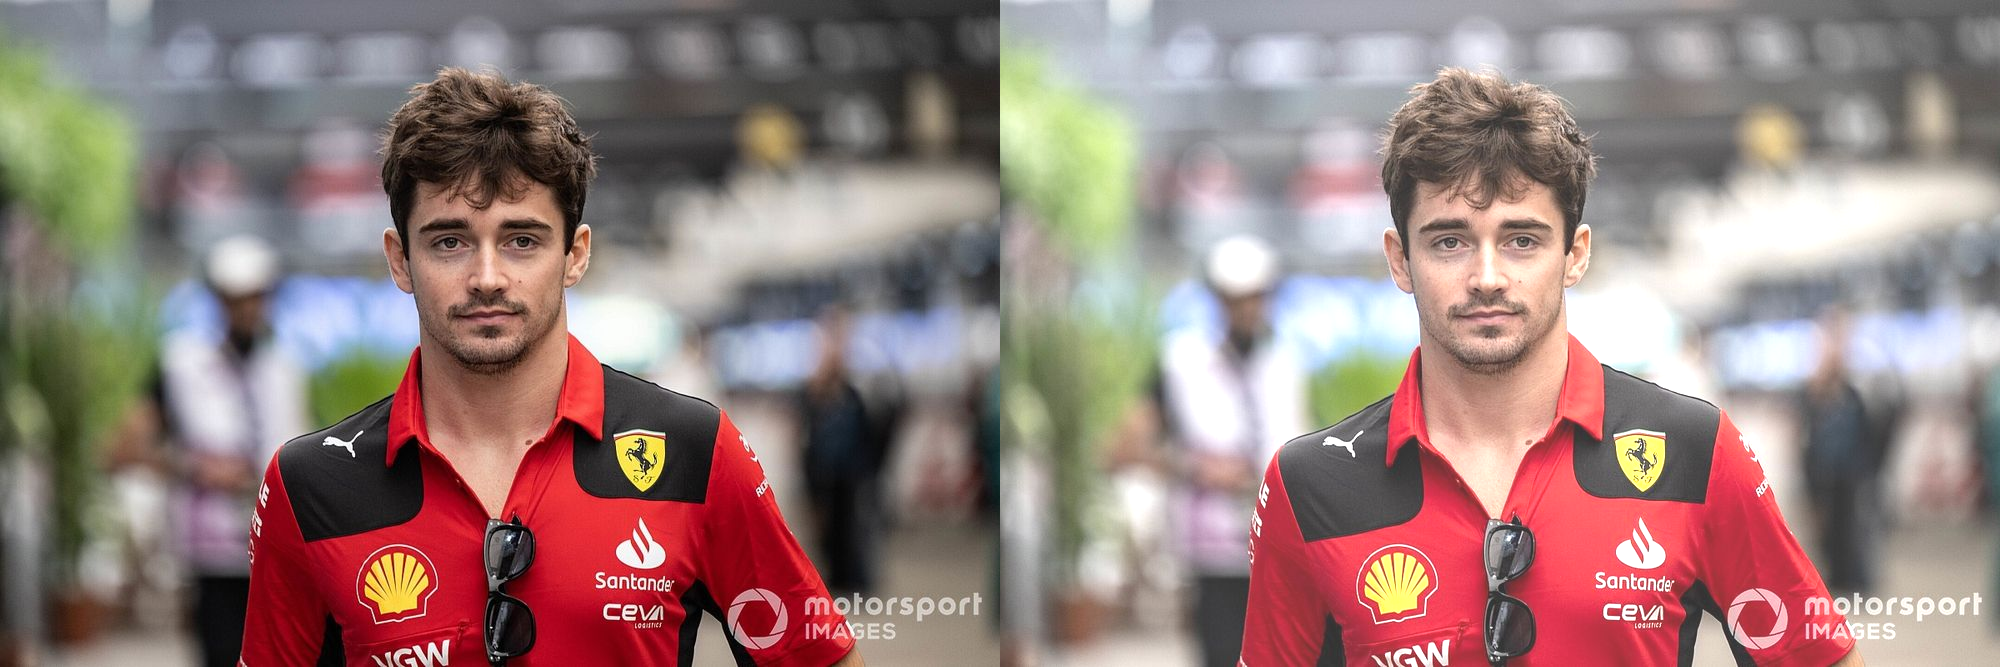

In [27]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
    brightness = int(input('Masukkan tingkat kecerahan citra: '))
except ValueError:
    print('Error, not a number')
    brightness = 0  # Set a default value if input is invalid

original = cv.imread('/content/drive/MyDrive/man.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# Cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat([original, brightness_image])

# Use cv.imshow if you are running this on your local machine
cv2_imshow(final_frame)



TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Mengubah citra menjadi invers
--------------------------------


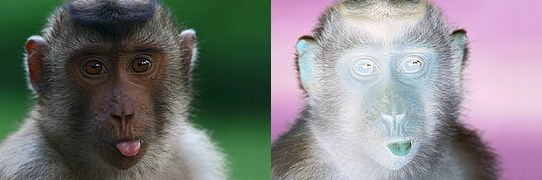

In [29]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah citra menjadi invers')
print('--------------------------------')

# Membaca gambar dari Google Drive
original = cv.imread('/content/drive/MyDrive/monkey.jpg')

if original is None:
    print("Gambar tidak ditemukan atau jalur gambar salah.")
else:
    # Melakukan inversi citra
    inverse_image = 255 - original

    # Menggabungkan citra asli dan citra invers secara horizontal
    final_frame = cv.hconcat([original, inverse_image])

    # Menampilkan hasil
    cv2_imshow(final_frame)


2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:


In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan dan kontras citra')
print('--------------------------------')

# Menerima input untuk brightness
try:
    brightness = int(input('Masukkan tingkat kecerahan citra (misal: 50 untuk meningkatkan, -50 untuk mengurangi): '))
except ValueError:
    print('Error, bukan angka yang valid')
    brightness = 0  # Nilai default jika input tidak valid

# Menerima input untuk contrast
try:
    C = float(input('Masukkan nilai kontras (misal: 50 untuk meningkatkan, -50 untuk mengurangi): '))
except ValueError:
    print('Error, bukan angka yang valid')
    C = 0  # Nilai default jika input tidak valid

# Membaca gambar dari Google Drive
original = cv.imread('/content/drive/MyDrive/man.jpg')

if original is None:
    print("Gambar tidak ditemukan atau jalur gambar salah.")
else:
    # Rumus menghitung contrast
    F = (259 * (C + 255)) / (255 * (259 - C))

    # Membuat gambar baru untuk brightness dan contrast
    brightness_contrast_image = np.zeros(original.shape, original.dtype)

    # Akses per piksel untuk brightness dan contrast
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                # Terapkan brightness
                pixel_brightness = np.clip(original[y, x, c] + brightness, 0, 255)

                # Terapkan contrast berdasarkan formula
                brightness_contrast_image[y, x, c] = np.clip(F * (pixel_brightness - 128) + 128, 0, 255)

    # Mengonversi hasil agar sesuai tipe citra
    brightness_contrast_image = brightness_contrast_image.astype(np.uint8)

    # Menggabungkan gambar asli dan gambar hasil brightness & contrast untuk perbandingan
    final_frame = cv.hconcat([original, brightness_contrast_image])

    # Menampilkan gambar asli dan hasil brightness & contrast
    cv2_imshow(final_frame)


Mengubah tingkat kecerahan dan kontras citra
--------------------------------
Masukkan tingkat kecerahan citra (misal: 50 untuk meningkatkan, -50 untuk mengurangi): 50
Masukkan nilai kontras (misal: 50 untuk meningkatkan, -50 untuk mengurangi): 2


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan citra menggunakan transformasi logaritmik')
print('-------------------------------------------------------------------')

# Menerima input untuk brightness dari pengguna
try:
    brightness = int(input('Masukkan tingkat kecerahan citra (misal: 50 untuk meningkatkan, -50 untuk mengurangi): '))
except ValueError:
    print('Error, bukan angka yang valid')
    brightness = 0  # Default value jika input tidak valid

# Membaca gambar dari Google Drive
original = cv.imread('/content/drive/MyDrive/man.jpg')

if original is None:
    print("Gambar tidak ditemukan atau jalur gambar salah.")
else:
    # Normalisasi nilai piksel ke rentang 0-255
    original = original.astype(np.float32) / 255.0

    # Konstanta skala c
    c = 1.0  # Anda bisa mengubah nilai ini sesuai kebutuhan

    # Menerapkan transformasi logaritmik
    log_brightness_image = c * np.log(1 + original)

    # Mengalikan kembali ke rentang 0-255
    log_brightness_image = np.clip(log_brightness_image * 255, 0, 255).astype(np.uint8)

    # Menambahkan kecerahan dari input pengguna
    final_image = np.clip(log_brightness_image + brightness, 0, 255).astype(np.uint8)

    # Menggabungkan gambar asli dan gambar yang sudah diubah
    final_frame = cv.hconcat([cv.convertScaleAbs(original * 255), final_image])

    # Menampilkan gambar asli dan hasil logaritmik dengan kecerahan yang diubah
    cv2_imshow(final_frame)
